# Question 1


In [15]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#Loading data
url = 'https://raw.githubusercontent.com/Sean-Kurian/Shopify-2022-Data-Science-Challenge/main/2019%20Winter%20Data%20Science%20Intern%20Challenge%20Data%20Set.csv'
df = pd.read_csv(url, warn_bad_lines=True)

Let's take a look at some key characteristics of our data:

In [25]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

As stated in the problem, an AOV of \$3145.13 is extremely high for a sneaker shop - this would be indicative of outliers skewing the mean. The standard deviation is also extremely high at \$41282.54, meaning that this is the average amount any given order differs from the mean - which makes the mean not a very good indicator. Our max is \$704,000 which is an absurd amount of money to spend on a single order at a shoe shop. Let's investigate a little more...


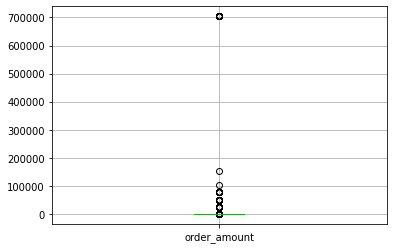

In [26]:
df.boxplot('order_amount')

This boxplot shows that there are quite a few outliers around the $700,000, which is definitely skewing our mean. For curiosities sake, let's take a look at them: 

In [33]:
unique_amounts = df.groupby(['order_amount']).size().reset_index(name = 'count').sort_values('order_amount', ascending=False)
unique_amounts.head(15)

,order_amount,count
257,704000,17
256,154350,1
255,102900,1
254,77175,9
253,51450,16
252,25725,19
251,1760,1
250,1408,2
249,1086,1
248,1064,1


It's odd that there are 17 orders to the tune of exactly $704,000 - and some of the other order amounts (77175, 51450 and 25725) in particular. 

In [37]:
high_orders = df.loc[df['order_amount'].isin([704000, 77175, 51450, 25725])].sort_values(by='order_amount', ascending = False)
high_orders

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00
...,...,...,...,...,...,...,...
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57


This might explain it. The orders worth $704,000 are placed at exactly the same time roughly every week at the same store by the same user, for the same number of items. It looks like this user is purchasing shoes wholesale on a regular basis - and this extremely high order value is what's skewing our AOV. 

**The metric least affected by skew is the median, and so is the metric we should use.**

In [38]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Returning to our descriptive statistics, **the median is \$284.00**, a much more reasonable average order value.

---



# Question 2

In [ ]:
SELECT COUNT(o.OrderID)
FROM Orders AS o, Shippers AS s
WHERE o.ShipperID = s.ShipperID AND s.ShipperName = "Speedy Express";


a) The above query yields **54 orders shipped by Speedy Express**



In [ ]:
SELECT TOP 1 e.LastName, COUNT(*)
FROM Employees as e, Orders as o
WHERE e.EmployeeID = o.EmployeeID
GROUP BY o.EmployeeID, e.LastName
ORDER BY COUNT(*) DESC


Running the above returns that **the last name of the employee with the most orders is Peacock**

In [ ]:
SELECT TOP 1 p.ProductName, SUM(od.Quantity)
FROM Customers AS c, Orders AS o, Products AS p, OrderDetails AS od
WHERE c.CustomerID = o.CustomerID AND od.OrderID = o.OrderID AND p.ProductID = od.ProductID AND c.Country = "Germany"
GROUP BY p.ProductID, p.ProductName
ORDER BY SUM(od.Quantity) DESC

Once more, **the product ordered most by customers in Germany is Boston Crab Meat** (ironic, huh?)